In [1]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as spstats

Populating the interactive namespace from numpy and matplotlib


In [2]:
efficiency_files = [
    "output/10_find_efficiency/2017-04-25 23:09:13 3bd3e7d/efficiency.csv"
]
transition_file = "output/11_find_performance/2017-05-03 08:54:42 b8d538c/fa_ga_transitions.csv"

In [3]:
perf = pd.DataFrame.from_csv(transition_file)
perf_nz = perf[perf["to_ga"] > 0]
perf_nz = perf_nz[perf_nz["to_fa"] > 0]

In [4]:
df = None
for f in efficiency_files:
    if df is None:
        df = pd.DataFrame.from_csv(f)
    else:
        df = pd.concat([df, pd.DataFrame.from_csv(f)])
df_nz = df[df["N_a"] > 0]
df_nz = df_nz[df_nz["N_b"] > 0]
df_nz = df_nz[df_nz["N_c"] > 0]
df_nz = df_nz[df_nz["Delta_a"] > 0]
df_nz = df_nz[df_nz["Delta_b"] > 0]
df_nz = df_nz[df_nz["Delta_c"] > 0]

In [5]:
a_eff = df_nz["Delta_a"]/df_nz["N_a"]
b_eff = df_nz["Delta_b"]/df_nz["N_b"]
c_eff = df_nz["Delta_c"]/df_nz["N_c"]
mean_a = a_eff.sum() / len(a_eff)
mean_b = b_eff.sum() / len(b_eff)
mean_c = c_eff.sum() / len(c_eff)
eff = pd.DataFrame(columns=["efficiency","a_eff", "b_eff", "c_eff"])
eff["efficiency"] = (a_eff/mean_a) * (b_eff/mean_b) * (c_eff/mean_c)
eff["a_eff"] = a_eff/mean_a
eff["b_eff"] = b_eff/mean_b
eff["c_eff"] = c_eff/mean_c

In [6]:
eff_perf = pd.concat([perf_nz, eff], axis=1, join="inner")
ga = eff_perf["to_ga"]
fa = eff_perf["to_fa"]
performance = ga/(ga+fa)
log_perf = np.log(performance)
efficiency = eff_perf["efficiency"]
r_a = spstats.pearsonr(np.log(eff_perf["a_eff"]), np.log(performance))
r_b = spstats.pearsonr(np.log(eff_perf["b_eff"]), np.log(performance))
r_c = spstats.pearsonr(np.log(eff_perf["c_eff"]), np.log(performance))

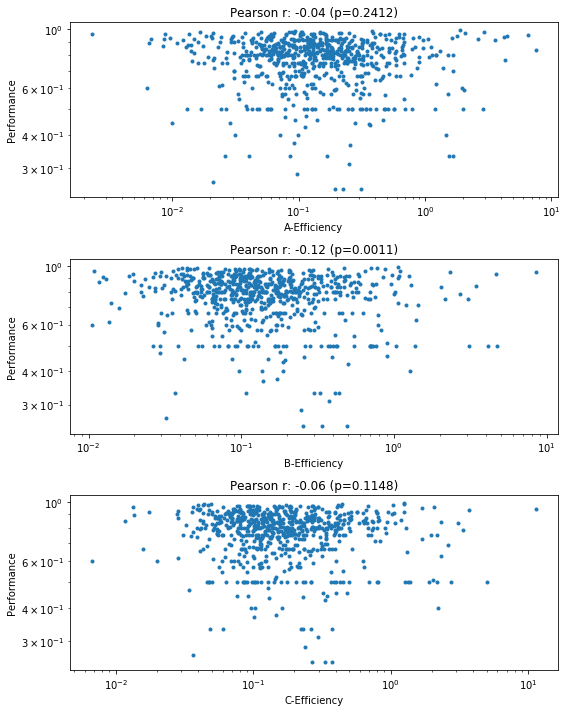

In [7]:
figure(figsize=(8,10))
subplot(3,1,1)
plt.loglog(eff_perf["a_eff"], performance, '.')
plt.xlabel("A-Efficiency")
plt.ylabel("Performance")
plt.title("Pearson r: %0.2f (p=%0.4f)" % r_a)
subplot(3,1,2)
plt.loglog(eff_perf["b_eff"], performance, '.')
plt.xlabel("B-Efficiency")
plt.ylabel("Performance")
plt.title("Pearson r: %0.2f (p=%0.4f)" % r_b)
subplot(3,1,3)
plt.loglog(eff_perf["c_eff"], performance, '.')
plt.xlabel("C-Efficiency")
plt.ylabel("Performance")
plt.title("Pearson r: %0.2f (p=%0.4f)" % r_c)
plt.tight_layout()